In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf

from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPool2D,Dropout

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Definimos los set de fotos de train y test

In [2]:
TRAIN_PATH = r"C:\Users\funny\Desktop\Bootcamp\mesa_trabajo_core\repo_sept_23\proyectos\ML-2\tibu_train"
TEST_PATH = r"C:\Users\funny\Desktop\Bootcamp\mesa_trabajo_core\repo_sept_23\proyectos\ML-2\tibu_test"

transformo las fotos para que sean todas iguales y modifico las fotos del test

In [3]:
class_names = ['Tiburon azul o Tintorera (Prionace glauca)',
               'Tiburon ballena (Rhincodon typus)',
               'Tiburon blanco (Carcharodon carcharias)',
               'Tiburon lamia (Carcharhinus leucas)',
               'Tiburon limon (Negaprion brevirostris)',
               'Tiburon mako o Marrajo (Isurus oxyrinchus)',
               'Tiburon martillo (Sphyrna mokarran)',
               'Tiburon nodriza (Ginglymostoma cirratum)',
               'Tiburon peregrino (Cethorhinus maximus)',
               'Tiburon punta blanca oceanico (Carcharhinus longimanus)',
               'Tiburon punta negra (Carcharhinus limbatus)',
               'Tiburon tigre (Galeocerdo cuvier)',
               'Tiburon toro (Carcharias taurus)',
               'Tiburon zorro (Alopias vulpinus)']

IMAGE_SIZE = (250,250)

In [4]:
class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
class_names_label

{'Tiburon azul o Tintorera (Prionace glauca)': 0,
 'Tiburon ballena (Rhincodon typus)': 1,
 'Tiburon blanco (Carcharodon carcharias)': 2,
 'Tiburon lamia (Carcharhinus leucas)': 3,
 'Tiburon limon (Negaprion brevirostris)': 4,
 'Tiburon mako o Marrajo (Isurus oxyrinchus)': 5,
 'Tiburon martillo (Sphyrna mokarran)': 6,
 'Tiburon nodriza (Ginglymostoma cirratum)': 7,
 'Tiburon peregrino (Cethorhinus maximus)': 8,
 'Tiburon punta blanca oceanico (Carcharhinus longimanus)': 9,
 'Tiburon punta negra (Carcharhinus limbatus)': 10,
 'Tiburon tigre (Galeocerdo cuvier)': 11,
 'Tiburon toro (Carcharias taurus)': 12,
 'Tiburon zorro (Alopias vulpinus)': 13}

In [5]:
#creamos una funcion para asegurarnos que las fotos tengan todas el mismo tamaño y color
def read_data(path, im_size, class_names_label):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)
        # Iterar sobre todo lo que haya en path
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path)
            
         # Agregar verificación para manejar imágenes que no se pueden leer
            if image is not None:
                print(f"Image path: {image_path}")
                print(f"Image shape before resize: {image.shape}")
                
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, im_size)
                X.append(image)
                y.append(label)
            else:
                print(f"Error al leer la imagen: {image_path}")
    
    
    return np.array(X), np.array(y)
    


X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE, class_names_label)

print(X_train.shape)
print(X_test.shape)

Image path: C:\Users\funny\Desktop\Bootcamp\mesa_trabajo_core\repo_sept_23\proyectos\ML-2\tibu_train\Tiburon azul o Tintorera (Prionace glauca)\00000000.jpg
Image shape before resize: (800, 1200, 3)
Image path: C:\Users\funny\Desktop\Bootcamp\mesa_trabajo_core\repo_sept_23\proyectos\ML-2\tibu_train\Tiburon azul o Tintorera (Prionace glauca)\00000001.jpg
Image shape before resize: (2667, 4000, 3)
Image path: C:\Users\funny\Desktop\Bootcamp\mesa_trabajo_core\repo_sept_23\proyectos\ML-2\tibu_train\Tiburon azul o Tintorera (Prionace glauca)\00000002.jpg
Image shape before resize: (758, 1200, 3)
Image path: C:\Users\funny\Desktop\Bootcamp\mesa_trabajo_core\repo_sept_23\proyectos\ML-2\tibu_train\Tiburon azul o Tintorera (Prionace glauca)\00000003.jpg
Image shape before resize: (1667, 2500, 3)
Image path: C:\Users\funny\Desktop\Bootcamp\mesa_trabajo_core\repo_sept_23\proyectos\ML-2\tibu_train\Tiburon azul o Tintorera (Prionace glauca)\00000004.jpg
Image shape before resize: (363, 622, 3)
Imag

In [6]:
print(y_train.shape)
print(y_test.shape)

(1520,)
(383,)


In [7]:
y_train

array([ 0,  0,  0, ..., 13, 13, 13])

In [8]:
#las fotos al provenir de carpetas estan ordenadas, las vamos a mezclar


X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [9]:
#comprobamos cuantas imagenes teneos por clase
pd.DataFrame(y_train).value_counts()

2     134
1     130
6     127
9     122
13    118
10    114
0     107
4     105
3     102
5     101
11     97
12     97
8      93
7      73
Name: count, dtype: int64

In [10]:
X_train.max()

255

Tiburon peregrino (Cethorhinus maximus)


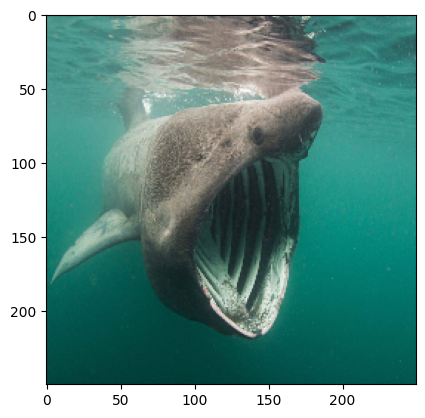

In [11]:
#imprimimos una imagen en pantalla para comprobarque la etiqueta e imagen esten bien
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index]);

In [12]:
#escalamos las fotos
X_train_scal = X_train/255.0
X_test_scal = X_test/255.0

In [13]:
X_train_scal.shape

(1520, 250, 250, 3)

Preparamos un modelo convolucional propio, comprobamos su accuracy y guardamos el modelo

In [14]:

model = Sequential()

model.add(Conv2D(filters= 32, kernel_size= 3, strides= (1,1), activation= 'relu', padding= 'same', input_shape= (250,250,3))) 
model.add(MaxPool2D()) 
model.add(Dropout(0.2)) 

model.add(Conv2D(filters= 64, kernel_size= 3, strides= (1,1), activation= 'relu', padding= 'same'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

# model.add(Conv2D(filters= 64, kernel_size= 3, strides= (1,1), activation= 'relu', padding= 'same'))
# model.add(MaxPool2D())
# model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(180, activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(100, activation='relu'))

model.add(Dense(14, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 125, 125, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 125, 125, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [16]:
from keras.optimizers import Adam

In [17]:
Adam??


Init signature:
Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
    **kwargs,
)
Docstring:     
Optimizer that implements the Adam algorithm.

Adam optimization is a stochastic gradient descent method that is based on
adaptive estimation of first-order and second-order moments.

According to
[Kingma et al., 2014](http://arxiv.org/abs/1412.6980),
the method is "*computationally
efficient, has little memory requirement, invariant to diagonal rescaling of
gradients, and is well suited for problems that are large in terms of
data/parameters*".

Args:
    learning_rate: A `tf.Tensor`, floating point value, a schedule that is a
        `tf.keras.optimizers.schedules.LearningRateSchedule`, or a callable
        that takes no arguments and 

In [18]:
optimizer=Adam(learning_rate=0.00001)

In [19]:
model.compile(optimizer= optimizer, loss= "sparse_categorical_crossentropy", metrics=['accuracy'])

In [20]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint(filepath='mi_mejor_modelo2.h5', save_best_only=True)

history = model.fit(X_train_scal, y_train, batch_size=10, epochs=50, validation_split=0.1, callbacks=[early_stopping, checkpoint])

Epoch 1/50


137/137 [==============================] - ETA: 0s - loss: 2.5998 - accuracy: 0.1038

c:\Users\funny\anaconda3\envs\deepln_env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


137/137 [==============================] - 68s 482ms/step - loss: 2.5998 - accuracy: 0.1038 - val_loss: 2.5468 - val_accuracy: 0.1513
Epoch 2/50
137/137 [==============================] - 64s 469ms/step - loss: 2.4997 - accuracy: 0.1499 - val_loss: 2.5098 - val_accuracy: 0.2171
Epoch 3/50
137/137 [==============================] - 62s 455ms/step - loss: 2.4292 - accuracy: 0.1871 - val_loss: 2.4653 - val_accuracy: 0.1776
Epoch 4/50
137/137 [==============================] - 63s 460ms/step - loss: 2.3817 - accuracy: 0.2054 - val_loss: 2.4202 - val_accuracy: 0.1974
Epoch 5/50
137/137 [==============================] - 63s 458ms/step - loss: 2.3415 - accuracy: 0.2061 - val_loss: 2.4004 - val_accuracy: 0.2237
Epoch 6/50
137/137 [==============================] - 62s 454ms/step - loss: 2.2880 - accuracy: 0.2346 - val_loss: 2.3711 - val_accuracy: 0.2500
Epoch 7/50
137/137 [==============================] - 64s 465ms/step - loss: 2.2568 - accuracy: 0.2478 - val_loss: 2.3455 - val_accuracy: 0.2

In [21]:
model.save("my_keras_model2.h5")

In [22]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,2.599835,0.103801,2.546783,0.151316
1,2.499748,0.149854,2.509778,0.217105
2,2.429178,0.187135,2.465320,0.177632
3,2.381686,0.205409,2.420158,0.197368
4,2.341525,0.206140,2.400405,0.223684
5,2.287986,0.234649,2.371051,0.250000
6,2.256846,0.247807,2.345454,0.243421
7,2.203954,0.272661,2.329447,0.289474
8,2.154920,0.299708,2.297494,0.296053
9,2.138984,0.301170,2.280401,0.289474


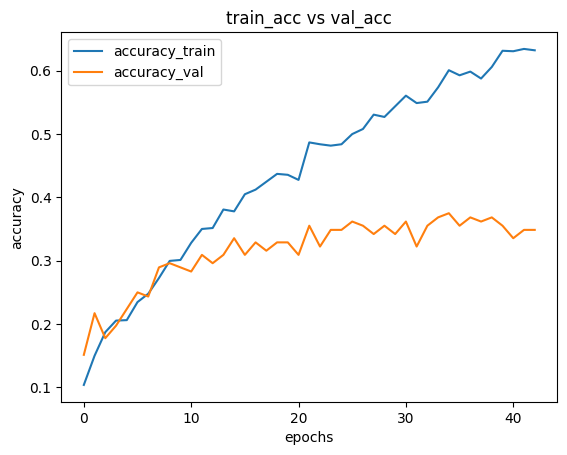

In [23]:
plt.figure()
plt.plot(df_hist['accuracy'], label="accuracy_train")
plt.plot(df_hist['val_accuracy'], label="accuracy_val")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [24]:
new_model = tf.keras.models.load_model('mi_mejor_modelo2.h5')

In [25]:
new_model.evaluate(X_test, y_test)

12/12 [==============================] - 1s 110ms/step - loss: 617.3529 - accuracy: 0.1488


[617.3529052734375, 0.14882506430149078]

In [26]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 1s 109ms/step - loss: 702.3564 - accuracy: 0.1410


[702.3563842773438, 0.1409921646118164]

In [ ]:
prediction= model.predict(X_test)

In [ ]:
prediction=np.argmax(model.predict(X_test),axis=1)
prediction

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,prediction)
cm

In [ ]:
class_shrk = ['Tiburon azul o Tintorera',
               'Tiburon ballena',
               'Tiburon blanco',
               'Tiburon lamia',
               'Tiburon limon',
               'Tiburon mako o Marrajo',
               'Tiburon martillo',
               'Tiburon nodriza',
               'Tiburon peregrino',
               'Tiburon punta blanca oceanico',
               'Tiburon punta negra',
               'Tiburon tigre',
               'Tiburon toro',
               'Tiburon zorro']

In [ ]:
import seaborn as sns

sns.heatmap(cm,xticklabels=class_shrk,yticklabels=class_shrk);

Tomamos un modelo ya existente y le añadimos capas para que clasifique en nuestras features, vemos el accuracy y si mejora sustituimos el modelo anterior

In [12]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

In [19]:
ResNet50V2??

Signature:
ResNet50V2(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
)
Docstring:
Instantiates the ResNet50V2 architecture.

Reference:
- [Identity Mappings in Deep Residual Networks](
    https://arxiv.org/abs/1603.05027) (CVPR 2016)

For image classification use cases, see
[this page for detailed examples](
  https://keras.io/api/applications/#usage-examples-for-image-classification-models).

For transfer learning use cases, make sure to read the
[guide to transfer learning & fine-tuning](
  https://keras.io/guides/transfer_learning/).

Note: each Keras Application expects a specific kind of input preprocessing.
For ResNetV2, call `tf.keras.applications.resnet_v2.preprocess_input` on your
inputs before passing them to the model.
`resnet_v2.preprocess_input` will scale input pixels between -1 and 1.

Args:
  include_top: whether to include the fully-connected
    layer

In [20]:
X_train.shape

(1520, 250, 250, 3)

In [21]:
X_train = preprocess_input(X_train)
X_train.shape


(1520, 250, 250, 3)

In [26]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
base_model_rsnt = ResNet50V2(include_top= False, input_shape=(250, 250, 3), weights='imagenet', classifier_activation= 'softmax')

In [27]:
from tensorflow.keras import layers
x = layers.Flatten()(base_model_rsnt.output)

x = layers.Dense(180, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)

x = layers.Dense(14, activation='softmax')(x)

model_rsnt = tf.keras.models.Model(base_model_rsnt.input, x)

model_rsnt.compile(optimizer= 'adam', loss= "sparse_categorical_crossentropy", metrics=['accuracy'])

In [28]:
model_rsnt.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 250, 250, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 256, 256, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 125, 125, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 127, 127, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

In [32]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
checkpoint = ModelCheckpoint(filepath='mi_mejor_modelo_rsnt.h5', save_best_only=True)

history_resnet = model_rsnt.fit(X_train_scal, y_train, batch_size=10, epochs=50, validation_split=0.1, callbacks=[early_stopping, checkpoint])

Epoch 1/50
137/137 [==============================] - ETA: 0s - loss: 3.0346 - accuracy: 0.1206

c:\Users\funny\anaconda3\envs\deepln_env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


137/137 [==============================] - 196s 1s/step - loss: 3.0346 - accuracy: 0.1206 - val_loss: 2.8384 - val_accuracy: 0.0000e+00
Epoch 2/50
137/137 [==============================] - 195s 1s/step - loss: 2.9892 - accuracy: 0.1316 - val_loss: 347.8578 - val_accuracy: 0.0000e+00
Epoch 3/50
137/137 [==============================] - 194s 1s/step - loss: 2.7701 - accuracy: 0.1404 - val_loss: 3.2405 - val_accuracy: 0.0000e+00
Epoch 4/50
137/137 [==============================] - 194s 1s/step - loss: 2.5347 - accuracy: 0.1681 - val_loss: 3.3675 - val_accuracy: 0.0000e+00


In [33]:
model_rsnt.save("my_resnet50v2_model.h5")

In [34]:
new_model = tf.keras.models.load_model('mi_mejor_modelo.h5')

In [35]:
new_model.evaluate(X_test, y_test)

12/12 [==============================] - 2s 186ms/step - loss: 765.9130 - accuracy: 0.1279


[765.9130249023438, 0.12793733179569244]

In [36]:
model_rsnt.evaluate(X_test, y_test)

12/12 [==============================] - 14s 1s/step - loss: 2580.0359 - accuracy: 0.0574


[2580.035888671875, 0.05744125321507454]

In [37]:
df_hist_rsnt = pd.DataFrame(history_resnet.history)
df_hist_rsnt

,loss,accuracy,val_loss,val_accuracy
0,3.034593,0.120614,2.838381,0.0
1,2.989231,0.131579,347.857788,0.0
2,2.770121,0.140351,3.240487,0.0
3,2.534679,0.168129,3.367501,0.0


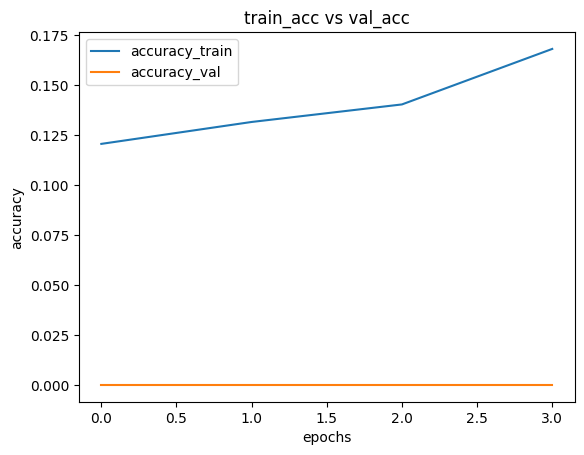

In [38]:
plt.figure()
plt.plot(df_hist_rsnt['accuracy'], label="accuracy_train")
plt.plot(df_hist_rsnt['val_accuracy'], label="accuracy_val")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()